<a href="https://colab.research.google.com/github/poonjijain/Task-1/blob/main/Task%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
#Importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



#Reading Data
Getting data from "students_scores" csv file


In [ ]:
#Reading data from dataset
dataset="/content/student_scores - student_scores.csv.txt"
data=pd.read_csv(dataset)
print("We have imported data sucessfully")
data.tail()

We have imported data sucessfully


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Now we'll plot graph "Hours Against Scores" to find relationship between them.


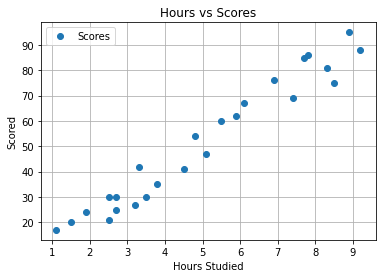

In [ ]:
# Plotting 
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scored')  
plt.grid()
plt.show()

It is clear from plot that there is a positive linear relation between Hours studied and Scores





# Preparing data


In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1:2].values  


 Splitting up the data into training and test sets.
 We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
#Importing train_test_split from  sklearn.model_selection
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
print("Data after splitting")
print("X_train\n",X_train,"\n X_test\n", X_test,"\ny_train\n", y_train,"\n y_test\n", y_test)

Data after splitting
X_train
 [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] 
 X_test
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] 
y_train
 [[35]
 [24]
 [86]
 [76]
 [17]
 [47]
 [85]
 [42]
 [81]
 [88]
 [67]
 [30]
 [25]
 [60]
 [30]
 [75]
 [21]
 [54]
 [95]
 [41]] 
 y_test
 [[20]
 [27]
 [69]
 [30]
 [62]]


#Training Algorithm
Time to train our algo

In [ ]:
#Importing LinearRegression
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


Plotting graph and Regression line

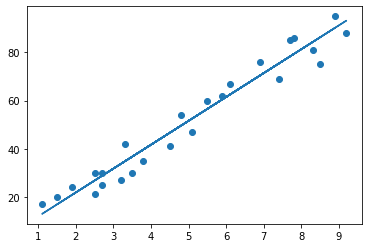

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#Making Predictions
Now that we have trained our algorithm, let us make some predictions

In [ ]:
# Testing data - In Hours
print(X_test) 
 # Predicting the scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test[:,0], 'Predicted': y_pred[:,0]})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# You can also test with your own data
hours=9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(9.25))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


In [ ]:
from  sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
print("Mean absolute error : ",mae)
#MSE
mse=metrics.mean_squared_error(y_test,y_pred)
print("Mean Squared error : ",mse)

Mean absolute error :  4.183859899002982
Mean Squared error :  21.598769307217456
